# Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV, learning_curve

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import optuna



# Data Understanding

In [54]:
df= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\LEVEL_KEAHLIAN.csv")
df.head()

,Unnamed: 0,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya
1,1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda
2,4,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula
3,5,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda
4,6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama


In [55]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya
1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda
2,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula
3,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda
4,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama


In [56]:
df

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya
1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda
2,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula
3,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda
4,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama
5,17.0,1.0,Tetap,11,DIP,B3,Malang,Pimpinan Pemula
6,0.0,6.0,Tetap,8,DSO,A3,Jakarta,Perekayasa Utama
7,3.0,9.0,Tetap,15,DIP,B4,Malang,Pimpinan Pemula
8,757.0,2.0,Tetap,14,DBM,B3,Jakarta,Perekayasa Utama
9,6.0,9.0,Tetap,8,DSO,B2-MI,Malang Madani,Perekayasa Muda


# Data Prep

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DURATIONS_PERPROJECT  40 non-null     float64
 1   TOTAL_PROJECT         40 non-null     float64
 2   STATUS                40 non-null     object 
 3   LAMA_KERJA            40 non-null     int64  
 4   DIVISI                40 non-null     object 
 5   GOL                   40 non-null     object 
 6   LOKASI                40 non-null     object 
 7   LEVEL KEAHLIAN        40 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ KB


In [58]:
df= df.drop(['LOKASI'], axis=1)

## Categorical Data

In [59]:
#objt(str) to category
df['STATUS'] = df['STATUS'].astype('category')
df['DIVISI'] = df['DIVISI'].astype('category')
df['GOL'] = df['GOL'].astype('category')
#df['LOKASI'] = df['LOKASI'].astype('category')

In [60]:
categorical_cols = ['STATUS', 'DIVISI', 'GOL']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [61]:
df['STATUS'].value_counts()

STATUS
1    35
0     5
Name: count, dtype: int64

In [62]:
# categorical_columns = ['STATUS', 'DIVISI', 'GOL']
# for col in categorical_columns:
#     encoder = LabelEncoder()
#     df[col] = encoder.fit_transform(df[col])

In [63]:
# def get_feature_mapping(df, feature_name):
#      encoder = LabelEncoder()
#      df[feature_name] = encoder.fit_transform(df[feature_name])
#      return dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
# mapping_status = get_feature_mapping(df, 'STATUS')
# mapping_divisi = get_feature_mapping(df, 'DIVISI')
# mapping_gol = get_feature_mapping(df, 'GOL')

In [64]:
# encoder_status, mapping_status = get_feature_mapping(df, 'STATUS')
# encoder_divisi, mapping_divisi = get_feature_mapping(df, 'DIVISI')
# encoder_gol, mapping_gol = get_feature_mapping(df, 'GOL')

In [65]:
# # Encoding target variable 'LEVEL_KEAHLIAN'
# encoder_level_keahlian = LabelEncoder()
# df['LEVEL_KEAHLIAN'] = encoder_level_keahlian.fit_transform(df['LEVEL KEAHLIAN'])
# mapping_LK = get_feature_mapping(df, 'LEVEL KEAHLIAN')

In [66]:
# print(f"Mapping Divisi:\n{mapping_divisi}\n\nMapping Gol:\n{mapping_gol}\n\nMapping Status:\n{mapping_status}")


In [67]:
df.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LEVEL KEAHLIAN
0,0.0,2.0,0,3,5,1,Perekayasa Madya
1,7.0,6.0,1,16,5,10,Pimpinan Muda
2,29.0,3.0,1,9,2,5,Pimpinan Pemula
3,0.0,51.0,1,16,2,10,Pimpinan Muda
4,1066.0,11.0,1,7,5,6,Perekayasa Utama


## Numerical data

In [68]:
#seperating numerical data
dfn= df[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']]

In [69]:
dfn.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.0,2.0,3
1,7.0,6.0,16
2,29.0,3.0,9
3,0.0,51.0,16
4,1066.0,11.0,7


In [70]:
#X_train normalization
scaler = MinMaxScaler()
normalized = scaler.fit_transform(dfn)
normalized = pd.DataFrame(normalized, columns=['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'])
normalized = normalized.round(2)
normalized.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.00,0.02,0.13
1,0.00,0.10,1.00
2,0.01,0.04,0.53
3,0.00,1.00,1.00
4,0.43,0.20,0.40


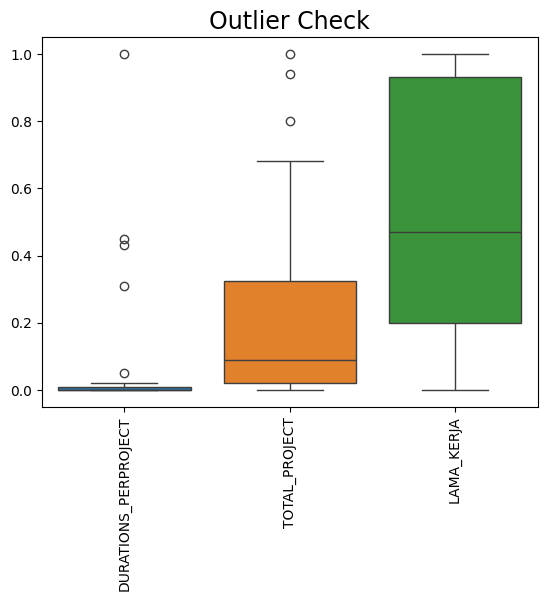

In [71]:
#displaying outliers
sns.boxplot(normalized)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

### DURATIONS_PERPROJECT

In [72]:
q1= normalized['DURATIONS_PERPROJECT'].quantile(0.25)
q3= normalized['DURATIONS_PERPROJECT'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)

# find the outliers of df
normalized.loc[(normalized['DURATIONS_PERPROJECT'] > upper_limit) | (normalized['DURATIONS_PERPROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
4,0.43,0.20,0.40
8,0.31,0.02,0.87
16,0.45,0.00,0.93
19,1.00,0.02,0.67
24,0.05,0.00,1.00


In [73]:
#trimming
dfn_D= normalized.loc[(normalized['DURATIONS_PERPROJECT'] < upper_limit) & (normalized['DURATIONS_PERPROJECT'] > lower_limit)]
print('before removing outliers:', len(normalized))
print('after removing outliers:', len(dfn_D))
print('outliers:', len(normalized) - len(dfn_D))

before removing outliers: 40
after removing outliers: 35
outliers: 5


<Axes: ylabel='DURATIONS_PERPROJECT'>

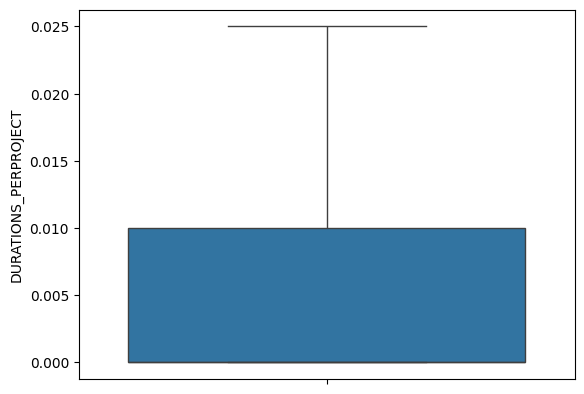

In [74]:
#capping: changing the outlier values to upper/lower limit values
dfn_D = normalized.copy()
dfn_D.loc[dfn_D['DURATIONS_PERPROJECT'] > upper_limit, 'DURATIONS_PERPROJECT'] = upper_limit
dfn_D.loc[dfn_D['DURATIONS_PERPROJECT'] < lower_limit, 'DURATIONS_PERPROJECT'] = lower_limit
sns.boxplot(dfn_D['DURATIONS_PERPROJECT'])

In [75]:
dfn_D= dfn_D.drop(['TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
dfn_D.head().round(2)

,DURATIONS_PERPROJECT
0,0.00
1,0.00
2,0.01
3,0.00
4,0.02


### TOTAL_PROJECT

In [76]:
#handling outliers w IQR [TOTAL_PROJECT]
q1= normalized['TOTAL_PROJECT'].quantile(0.25)
q3= normalized['TOTAL_PROJECT'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)

# find the outliers of df
normalized.loc[(normalized['TOTAL_PROJECT'] > upper_limit) | (normalized['TOTAL_PROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
3,0.0,1.00,1.00
26,0.0,0.94,0.87
32,0.0,0.80,0.20


In [77]:
#trimming
dfn_P= normalized.loc[(normalized['TOTAL_PROJECT'] < upper_limit) & (normalized['TOTAL_PROJECT'] > lower_limit)]
print('before removing outliers:', len(normalized))
print('after removing outliers:', len(dfn_P))
print('outliers:', len(normalized) - len(dfn_P))

before removing outliers: 40
after removing outliers: 37
outliers: 3


<Axes: ylabel='TOTAL_PROJECT'>

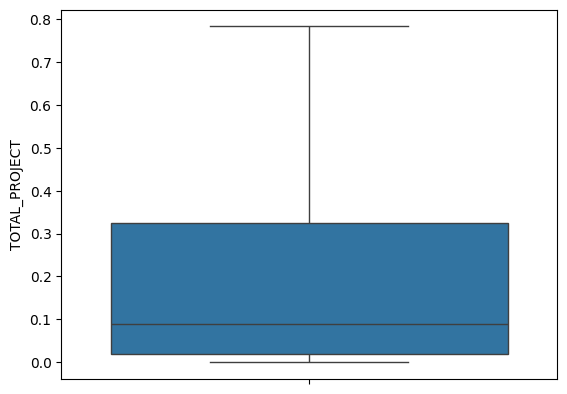

In [78]:
#capping: changing the outlier values to upper/lower limit values
dfn_P = normalized.copy()
dfn_P.loc[dfn_P['TOTAL_PROJECT'] > upper_limit, 'TOTAL_PROJECT'] = upper_limit
dfn_P.loc[dfn_P['TOTAL_PROJECT'] < lower_limit, 'TOTAL_PROJECT'] = lower_limit
sns.boxplot(dfn_P['TOTAL_PROJECT'])

In [79]:
dfn_P= dfn_P.drop(['DURATIONS_PERPROJECT', 'LAMA_KERJA'], axis=1)
dfn_P.head().round(2)

,TOTAL_PROJECT
0,0.02
1,0.10
2,0.04
3,0.78
4,0.20


## Concating to dfn

In [80]:
normalized= normalized.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT'], axis=1)

In [81]:
dfn.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.0,2.0,3
1,7.0,6.0,16
2,29.0,3.0,9
3,0.0,51.0,16
4,1066.0,11.0,7


In [82]:
#reuniting them to X_train
dfn_new = pd.concat([dfn_D, dfn_P, normalized], axis=1)

In [83]:
dfn_new.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.000,0.0200,0.13
1,0.000,0.1000,1.00
2,0.010,0.0400,0.53
3,0.000,0.7825,1.00
4,0.025,0.2000,0.40


In [84]:
dfn_new=dfn_new.copy()

In [85]:
df= df.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)

In [86]:
#combining the final X_train

#checking the indices
print(dfn_new.index)
print(df.index)

RangeIndex(start=0, stop=40, step=1)
RangeIndex(start=0, stop=40, step=1)


In [87]:
#reset indices
dfn_new = dfn_new.reset_index(drop=True)
df = df.reset_index(drop=True)

In [88]:
#concating
df = pd.concat([dfn_new, df], axis=1)

In [89]:
df.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS,DIVISI,GOL,LEVEL KEAHLIAN
0,0.000,0.0200,0.13,0,5,1,Perekayasa Madya
1,0.000,0.1000,1.00,1,5,10,Pimpinan Muda
2,0.010,0.0400,0.53,1,2,5,Pimpinan Pemula
3,0.000,0.7825,1.00,1,2,10,Pimpinan Muda
4,0.025,0.2000,0.40,1,5,6,Perekayasa Utama


# Data Modelling & Evaluations

## Feature Selection

In [90]:
#data feature selection
X= df.drop(['LEVEL KEAHLIAN'], axis=1)
y= df['LEVEL KEAHLIAN']

In [91]:
X.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS,DIVISI,GOL
0,0.000,0.0200,0.13,0,5,1
1,0.000,0.1000,1.00,1,5,10
2,0.010,0.0400,0.53,1,2,5
3,0.000,0.7825,1.00,1,2,10
4,0.025,0.2000,0.40,1,5,6


## Train Test Split

In [92]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## KFold & Tunning

the differences of KFold and StratifiedKFold
KFold
1. **Cara Kerja**: Membagi dataset secara acak menjadi k-fold. Setiap fold digunakan sebagai data testing sekali, sedangkan sisanya sebagai data training.
2. **Kekurangan**: Tidak menjamin distribusi kelas yang sama pada setiap fold, terutama jika dataset tidak seimbang. Hal ini bisa menyebabkan bias dalam evaluasi model.

StratifiedKFold
1. **Cara Kerja**: Membagi dataset menjadi k-fold, tetapi memastikan bahwa proporsi kelas dalam setiap fold sama dengan proporsi kelas dalam dataset keseluruhan.
2. **Keuntungan**: Menjaga distribusi kelas yang seimbang pada setiap fold, sehingga evaluasi model lebih 3. representatif. Sangat berguna untuk dataset yang tidak seimbang.
3. **Kekurangan**: Membutuhkan informasi tentang kelas target.

In [93]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index] 

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


### Tuning w/ Optuna

In [ ]:
def objective(trial):
    model_type = trial.suggest_categorical('model_type', ['DecisionTree', 'RandomForest'])

    if model_type == 'DecisionTree':
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    elif model_type == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=100)
    # elif model_type == 'SVM':
    #     C = trial.suggest_float('C', 0.1, 10.0)
    #     kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    #     model = SVC(C=C, kernel=kernel, random_state=42)
    # elif model_type == 'NaiveBayes':
    #     model = GaussianNB()
  
    # Evaluate using cross-validation
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy').mean()
    return score

# Optuna study for hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters
print("Best parameters:", study.best_params)


In [ ]:
# Access the best parameters
best_params = study.best_params
print("Best parameters:", best_params)

## Eval

In [ ]:
# Selecting the best model from optuna
if best_params['model_type'] == 'DecisionTree':
    model = DecisionTreeClassifier(max_depth=best_params['max_depth'], random_state=100)
elif best_params['model_type'] == 'RandomForest':
    model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=100)
# elif best_params['model_type'] == 'SVM':
#     model = SVC(C=best_params['C'], kernel=best_params['kernel'], random_state=42)
# elif best_params['model_type'] == 'NaiveBayes':
#     model = GaussianNB()


accuracy of 75

n_estimators=83,
        max_depth=5,
        min_samples_split=3,
        min_samples_leaf=2,
        max_features='log2',
        random_state=100

n_estimators=75,
        max_depth=5,
        min_samples_split=3,
        min_samples_leaf=2,
        max_features='log2',
        random_state=100

In [95]:

modela = RandomForestClassifier(
        n_estimators=75,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='log2',
        random_state=100)

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# # Create a Bagging classifier with the Random Forest as base estimator
# bg = BaggingClassifier(base_estimator=modela, n_estimators=10, random_state=42)
# bg.fit(X_train, y_train)

#Train the best model on the entire training set
modela.fit(X_train, y_train)

# Evaluate on the test set
y_pred = modela.predict(X_test)
# y_pred = bg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, zero_division=0))

# Check if the accuracy meets the threshold
if accuracy >= 0.70:
    print("Model achieved at least 70% accuracy.")
else:
    print("Model did not achieve 70% accuracy.")

Test set accuracy: 0.75
                   precision    recall  f1-score   support

 Perekayasa Madya       1.00      0.50      0.67         2
Perekayasa Magang       0.50      1.00      0.67         1
 Perekayasa Utama       0.67      1.00      0.80         2
    Pimpinan Muda       1.00      1.00      1.00         2
  Pimpinan Pemula       0.00      0.00      0.00         1

         accuracy                           0.75         8
        macro avg       0.63      0.70      0.63         8
     weighted avg       0.73      0.75      0.70         8

Model achieved at least 70% accuracy.


In [96]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 1, 0, 0]], dtype=int64)

In [97]:
# Calculate the mean K-Fold cross-validation score
mean_kfold_score = cross_val_score(modela, X_train, y_train, cv=skf, scoring='accuracy').mean()
#print(f"Mean K-Fold cross-validation score: {mean_kfold_score:.2f}")
print(f"{modela} Mean cross-validation score: {mean_kfold_score:.2f}\n")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=2,
                       n_estimators=75, random_state=100) Mean cross-validation score: 0.28



In [98]:
# # Learning curve
# train_sizes, train_scores, test_scores = learning_curve(modela, X, y, cv=skf, n_jobs=-1)

# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title('Learning Curve')
# plt.xlabel('Training examples')
# plt.ylabel('Score')
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

### Graph Displays

Masih overfit: target besok, mencoba early stopping dan cara agar tidak overfit

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


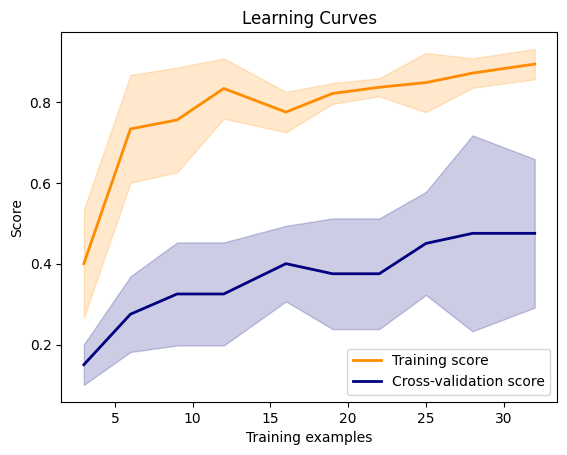

In [99]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    modela, X, y, cv=skf, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and test sets
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training score', color='darkorange', lw=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='darkorange')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='navy', lw=2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='navy')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curves')
plt.show()

### Model Prediction

In [100]:
# input_data= (0.0, 2.0, 3)
# input_data_as_numpy_array= np.array(input_data)
# input_data_reshape= input_data_as_numpy_array.reshape(1,-1)
# std_data= scaler.transform(input_data_reshape)
# print(std_data)

In [101]:
# prediction= modela.predict(std_data)
# print(prediction)

In [102]:
# print(f"Mapping Divisi:\n{mapping_divisi}\n\nMapping Gol:\n{mapping_gol}\n\nMapping Status:\n{mapping_status}\n\nMapping Status:\n{mapping_LK}")


In [103]:
# # Fungsi untuk mengonversi input data kategorikal menjadi numerik
# def preprocess_input(input_data):
#     # Inisialisasi dictionary untuk mapping
#     status_map = {'Kontrak': 0, 'Tetap': 1}
#     divisi_map = {'DAK': 0, 'DBM': 1, 'DIP': 2, 'DLA': 3, 'DMS': 4, 'DS0': 5}
#     gol_map = {'A3': 0, 'B1': 1, 'B1-MI': 2, 'B2': 3, 'B2-MI': 4, 'B3': 5, 'B3-MI': 6, 'B4': 7, 'C1': 8, 'C2': 9, 'C3': 10, 'F2': 11}
#     # lokasi_map = {'Jakarta': 0, 'Malang': 1, 'Malang Madani': 2}
    
#     # Mapping menggunakan if-else
#     input_data['STATUS'] = status_map[input_data['STATUS']]
#     input_data['DIVISI'] = divisi_map[input_data['DIVISI']]
#     input_data['GOL'] = gol_map[input_data['GOL']]
#     # input_data['LOKASI'] = lokasi_map[input_data['LOKASI']]
    
#     return input_data


In [104]:
# # Contoh data input baru (kategorikal)
# input_data = {
#     'DURATIONS_PERPROJECT': 10.0,
#     'TOTAL_PROJECT': 6.0,
#     'LAMA_KERJA': 8,
#     'STATUS': 'Tetap',
#     'DIVISI': 'DMS',
#     'GOL': 'A3'
# }

In [105]:
# # Preprocessing input data (encoding kategorikal)
# input_data['STATUS'] = list(mapping_status.keys())[list(mapping_status.values()).index(input_data['STATUS'])]
# input_data['DIVISI'] = list(mapping_divisi.keys())[list(mapping_divisi.values()).index(input_data['DIVISI'])]
# input_data['GOL'] = list(mapping_gol.keys())[list(mapping_gol.values()).index(input_data['GOL'])]

# # Ubah data input menjadi DataFrame
# input_data_df = pd.DataFrame([input_data])

# # Scaling data input
# input_data_scaled = scaler.fit_transform(input_data_df)

# # Lakukan prediksi dengan model yang telah dilatih
# prediction = modela.predict(input_data_scaled)

# # Print hasil prediksi dalam bentuk kategorikal
# #print("Prediksi Level Keahlian:", encoder_level_keahlian.inverse_transform(prediction))
# print("Prediksi Level Keahlian:", prediction)


In [106]:
# def predict_keahlian(input_data):
#     # Convert input data to DataFrame
#     input_df = pd.DataFrame([input_data], columns=X.columns)
    
#     # Handle categorical data encoding
#     for col, le in label_encoders.items():
#         input_df[col] = le.transform(input_df[col])
    
#     numerical_cols = ['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']
#     # Handle numerical data scaling
#     input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    
#     # Predict
#     prediction = modela.predict(input_df)
    
#     # Return the predicted LEVEL KEAHLIAN
#     return prediction[0]

# # Example of how to use the predict_keahlian function
# new_data = {
#     'DURATIONS_PERPROJECT': 1.0,
#     'TOTAL_PROJECT': 1.0,
#     'STATUS': 'Tetap',
#     'LAMA_KERJA': 4,
#     'DIVISI': 'DBM',
#     'GOL': 'C1'
# }

# predicted_keahlian = predict_keahlian(new_data)
# print(f"Predicted LEVEL KEAHLIAN: {predicted_keahlian}")


In [107]:
# Fungsi untuk melakukan prediksi
def predict_keahlian(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Gunakan kembali LabelEncoders yang sudah disimpan
    for col, le in label_encoders.items():
        input_df[col] = le.transform(input_df[col])  # Gunakan transform, bukan fit_transform
    
    # Handle scaling numerical data
    numerical_cols = ['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    
    # Lakukan prediksi
    prediction = modela.predict(input_df)
    
    return prediction[0]

# Contoh penggunaan
new_data = {
    'DURATIONS_PERPROJECT': 1.0,
    'TOTAL_PROJECT': 1.0,
    'STATUS': 'Tetap',
    'LAMA_KERJA': 4,
    'DIVISI': 'DBM',
    'GOL': 'C1'
}

predicted_keahlian = predict_keahlian(new_data)
print(f"Predicted LEVEL KEAHLIAN: {predicted_keahlian}")

Predicted LEVEL KEAHLIAN: Perekayasa Utama


### Rough

In [118]:
new_data = {
    'DURATIONS_PERPROJECT': 1.0,
    'TOTAL_PROJECT': 1.0,
    'STATUS': 'Tetap',
    'LAMA_KERJA': 4,
    'DIVISI': 'DSO',
    'GOL': 'B1'
}

In [119]:
input_df = pd.DataFrame([new_data], columns=X.columns)


In [121]:
for col, le in label_encoders.items():
        input_df[col] = le.fit_transform(input_df[col])

In [122]:
input_df

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS,DIVISI,GOL
0,1.0,1.0,4,0,0,0


In [ ]:
# new_data